## Import & Load
Load and read the BankSim CSV and relevant libraries.

In [ ]:
# ================================
# 1) Import & Load
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import precision_score, recall_score, confusion_matrix

df = pd.read_csv(r"C:\Users\beras\Desktop\Fraud_analyst_project\bs140513_032310.csv")
print("Loaded file:", df)


## Quick examination
Basic sanity checks: shape, head, missing values, duplicates, dtypes, and unique counts per column.

In [ ]:
# ================================
# 2) Quick examination
# ================================
print("Dataset shape (rows, columns):", df.shape)



```
Dataset shape (rows, columns): (594643, 10)
```



In [ ]:
print(df.head(10))



```
   step       customer  age gender zipcodeOri       merchant zipMerchant  \
0     0  'C1093826151'  '4'    'M'    '28007'   'M348934600'     '28007'   
1     0   'C352968107'  '2'    'M'    '28007'   'M348934600'     '28007'   
2     0  'C2054744914'  '4'    'F'    '28007'  'M1823072687'     '28007'   
3     0  'C1760612790'  '3'    'M'    '28007'   'M348934600'     '28007'   
4     0   'C757503768'  '5'    'M'    '28007'   'M348934600'     '28007'   
5     0  'C1315400589'  '3'    'F'    '28007'   'M348934600'     '28007'   
6     0   'C765155274'  '1'    'F'    '28007'   'M348934600'     '28007'   
7     0   'C202531238'  '4'    'F'    '28007'   'M348934600'     '28007'   
8     0   'C105845174'  '3'    'M'    '28007'   'M348934600'     '28007'   
9     0    'C39858251'  '5'    'F'    '28007'   'M348934600'     '28007'   

              category  amount  fraud  
0  'es_transportation'    4.55      0  
1  'es_transportation'   39.68      0  
2  'es_transportation'   26.89      0  
3  'es_transportation'   17.25      0  
4  'es_transportation'   35.72      0  
5  'es_transportation'   25.81      0  
6  'es_transportation'    9.10      0  
7  'es_transportation'   21.17      0  
8  'es_transportation'   32.40      0  
9  'es_transportation'   35.40      0  
```



In [ ]:
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)

duplicate_rows = int(df.duplicated().sum())
print(f"\nNumber of duplicate rows: {duplicate_rows}")



```
Missing values per column:| Number of duplicate rows: 0
step           0          |
customer       0          |
age            0          |
gender         0          |
zipcodeOri     0          |
merchant       0          |
zipMerchant    0          |
category       0          |
amount         0          |
fraud          0          |
dtype: int64              |
```



In [ ]:
print("\nData types:\n", df.dtypes)

print("\nNumber of unique values per column:\n", df.nunique(dropna=False).sort_values())



```
Data types:            | Number of unique values per column:  
step             int64 | zipMerchant        1
customer        object | zipcodeOri         1
age             object | fraud              2
gender          object | gender             4
zipcodeOri      object | age                8
merchant        object | category          15
zipMerchant     object | merchant          50
category        object | step             180
amount         float64 | customer        4112
fraud            int64 | amount         23767
dtype: object          | dtype: int64
```



## Cleaning & normalization of the data
Drop irrelevant columns and normalize columns


In [ ]:
# ============================================
# Block 3 — Minimal cleaning + gender normalization
# ============================================

# drop ZIP columns at the start of the block (both are constant)
df = df.drop(columns=['zipcodeOri', 'zipMerchant'])
print("Dropped constant ZIP columns: zipcodeOri, zipMerchant")

# 1) strip quotes/whitespace in relevant text columns
text_cols = ['customer','age','gender','merchant','category']
for c in text_cols:
    df[c] = (
        df[c].astype(str)
             .str.strip()
             .str.strip("'")
             .str.strip('"')
    )

# 2) normalize categories
df['gender']   = df['gender'].str.lower().replace({'e':'unknown', 'u':'unknown'})
df.loc[~df['gender'].isin(['m','f','unknown']), 'gender'] = 'unknown'
df['category'] = df['category'].str.lower()

# 3) convert 'age' -> numeric (nullable Int64) — may create NaN/<NA> for non-numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce').astype('Int64')

# --- sanity check
print("Shape:", df.shape)
print("Missing values per column:")
print(df.isna().sum().sort_values(ascending=False))



```
Dropped constant ZIP columns: zipcodeOri, zipMerchant
Shape: (594643, 10)
Missing values per column:
age         1178
step           0
customer       0
gender         0
merchant       0
category       0
amount         0
fraud          0
day            0
hour           0
dtype: int64

```




## Handling missing age
Create `age_unknown` flag and fill `age` with sentinel (-1).

In [ ]:
# ============================================
# Block 3B — Fill NaNs discovered + sentinel
# ============================================

# create a flag (1 if age was missing)
df['age_unknown'] = df['age'].isna().astype('int64')

# fill 'age' with sentinel -1 (keep Int64)
df['age'] = df['age'].fillna(-1).astype('Int64')

# quick sanity check after fill
print("\nNaN in 'age' AFTER fill:", int(df['age'].isna().sum()))



```
NaN in 'age' AFTER fill: 0
```



## Exploratory Data Analysis (EDA)
Distribution checks, fraud rate across categories/time, and numeric behavior (selected visuals + summaries).

Class balance

In [ ]:
# Class balance
class_balance = pd.concat(
    [df['fraud'].value_counts().rename('count'),
     (df['fraud'].value_counts(normalize=True)* 100).round(3).rename('percent')],
    axis=1
).rename_axis('fraud').reset_index()
print("\nClass balance:\n", class_balance)
plt.figure(figsize=(4,3))
sns.barplot(data=class_balance, x='fraud', y='count')
plt.title('Class balance')
plt.tight_layout()
plt.show()

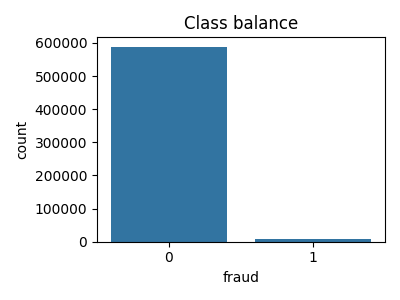

Defining plot/table functions

In [ ]:
categorical_columns = ['category', 'merchant', 'gender', 'day', 'hour', 'step']
numeric_columns     = ['amount', 'age']
def plot_categorical_distribution_percent(df, column):
def plot_numeric_by_fraud(df, column):
def summary_categorical_table(df, column):
def summary_numeric_binned_table(df, column):

printing plots and tables regarding data about the fraud

In [ ]:
# Run categorical plots
for col in categorical_columns:
    plot_categorical_distribution_percent(df, col)

# Run numeric plots
for col in numeric_columns:
    plot_numeric_by_fraud(df, col)

# Run categorical summaries for each categorical column
for col in categorical_columns:
    cat_summary = summary_categorical_table(df, col)   # returns DataFrame (only categories with n_fraud > 0)
    print(cat_summary.head(20))                      # show top-20 rows

# Run numeric binned summaries for each numeric column
for col in numeric_columns:
    num_summary = summary_numeric_binned_table(df, col)
    print(num_summary.head(20))

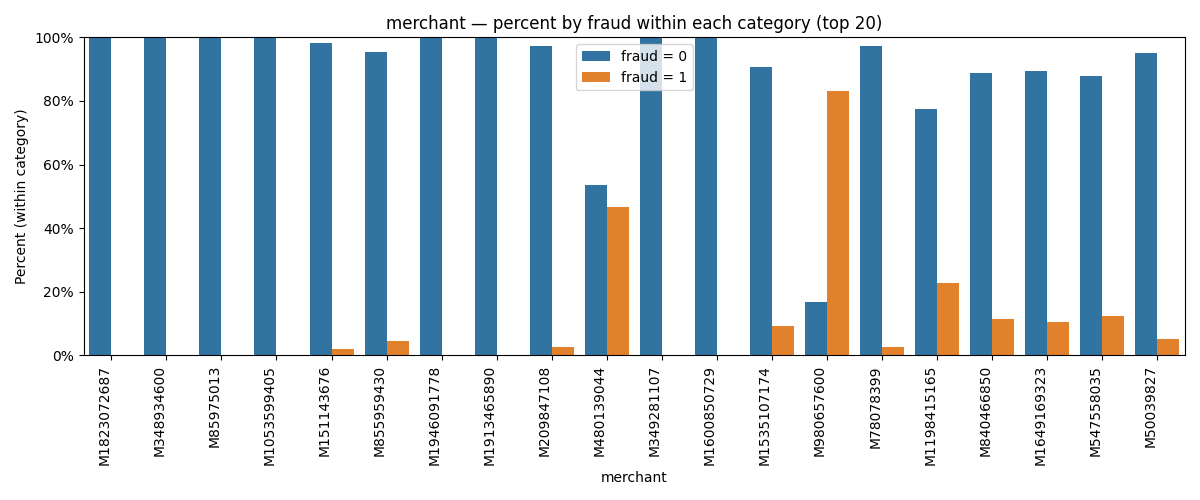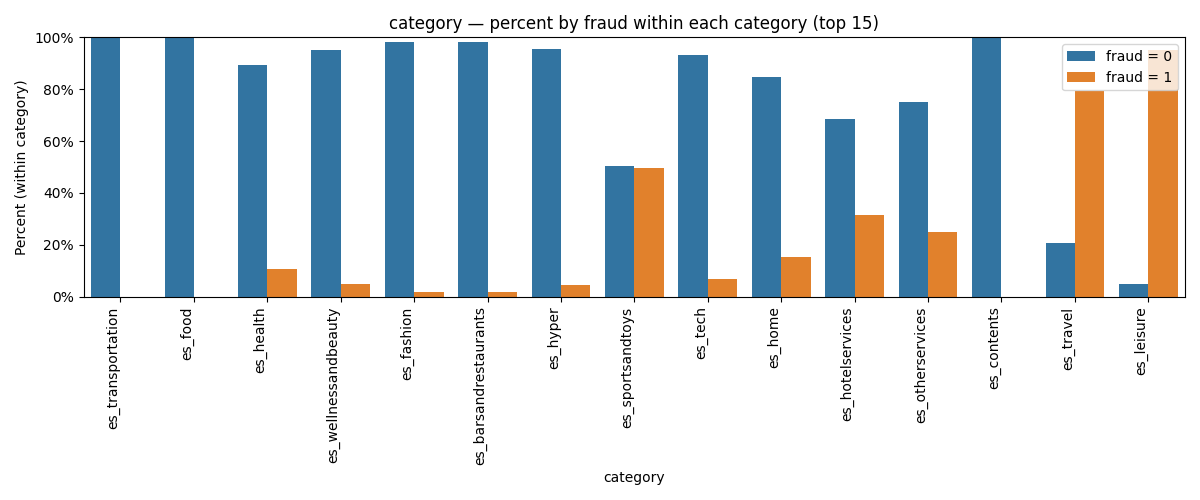
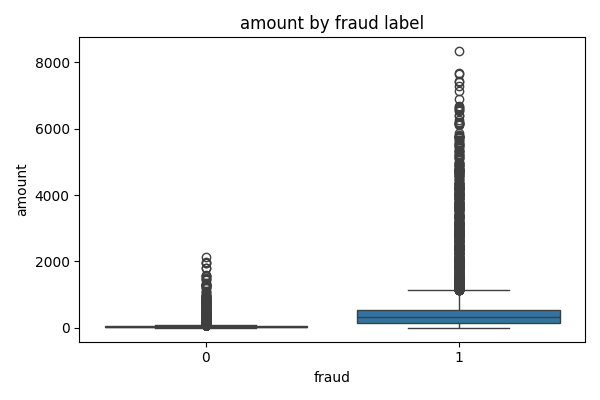

```
Numeric distributions by fraud:

=== CATEGORICAL SUMMARIES (top rows) ===

--- Summary for: category ---
           category_value  n_total  n_fraud  fraud_rate_pct  \
0              es_leisure      499      474          94.990   
1               es_travel      728      578          79.396   
2        es_sportsandtoys     4002     1982          49.525   
3        es_hotelservices     1744      548          31.422   
4        es_otherservices      912      228          25.000   
5                 es_home     1986      302          15.206   
6               es_health    16133     1696          10.513   
7                 es_tech     2370      158           6.667   
8    es_wellnessandbeauty    15086      718           4.759   
9                es_hyper     6098      280           4.592   
10  es_barsandrestaurants     6373      120           1.883   
11             es_fashion     6454      116           1.797   

    share_of_all_frauds_pct  
0                     6.583  
1                     8.028  
2                    27.528  
3                     7.611  
4                     3.167  
5                     4.194  
6                    23.556  
7                     2.194  
8                     9.972  
9                     3.889  
10                    1.667  
11                    1.611  

--- Summary for: merchant ---
   category_value  n_total  n_fraud  fraud_rate_pct  share_of_all_frauds_pct
0     M1294758098      191      184          96.335                    2.556
1        M3697346      308      290          94.156                    4.028
2     M1873032707      250      216          86.400                    3.000
3      M732195782      608      518          85.197                    7.194
4      M980657600     1769     1472          83.211                   20.444
5     M1353266412       78       64          82.051                    0.889
6      M857378720      122       92          75.410                    1.278
7     M2080407379       48       36          75.000                    0.500
8     M2011752106      244      166          68.033                    2.306
9       M17379832      282      178          63.121                    2.472
10    M2122776122      341      200          58.651                    2.778
11     M480139044     3508     1634          46.579                   22.694
12    M1741626453      528      196          37.121                    2.722
13     M495352832       69       24          34.783                    0.333
14     M923029380      323      102          31.579                    1.417
15    M1888755466      912      228          25.000                    3.167
16    M1198415165     1580      358          22.658                    4.972
17     M933210764       69       12          17.391                    0.167
18    M1748431652      274       36          13.139                    0.500
19     M547558035      949      116          12.223                    1.611


=== NUMERIC BINNED SUMMARIES (top rows) ===

--- Binned summary for: amount ---
             amount  n_total  n_fraud  fraud_rate_pct  share_of_all_frauds_pct
0  (42.54, 8329.96]   148631     6699           4.507                   93.042
1     (26.9, 42.54]   148618      189           0.127                    2.625
2     (13.74, 26.9]   148688      156           0.105                    2.167
3   (-0.001, 13.74]   148706      156           0.105                    2.167
```

##Feature engineering

setting thresholds and creating "masks" for the rules

In [ ]:
print(f"\nGlobal fraud rate: {global_fraud_rate*100:.3f}%")
print(category_stats['lift'].rename('lift').rename_axis('category').reset_index().to_string(index=False))
print(merchant_stats['lift'].rename('lift').rename_axis('merchant').reset_index().to_string(index=False))
high_lift_categories = category_stats.query("count >= @min_support and lift >= @min_lift").index.tolist()
high_lift_merchants = merchant_stats.query("count >= @min_support and lift >= @min_lift").index.tolist()
print(f"Risky sets — categories: {len(high_lift_categories)} | merchants: {len(high_lift_merchants)}")



```
Global fraud rate: 1.211%
---
          category       lift  |   merchant     lift
es_barsandrestaurants  1.555110| M1053599405  0.000000
es_contents            0.000000| M117188757   0.000000
es_fashion             1.484406| M1198415165 18.713273
es_food                0.000000| M1294758098 79.562472
es_health              8.682295| M1313686961  0.000000
es_home               12.558897| M1352454843  0.000000
es_hotelservices      25.951227| M1353266412 67.765584
es_hyper               3.792228| M1400236507  0.000000
es_leisure            78.451565| M1416436880  0.000000
es_otherservices      20.647326| M151143676   1.555110
es_sportsandtoys      40.902550| M1535107174  7.693008
es_tech                5.505954| M1600850729  0.000000
es_transportation      0.000000| M1649169323  8.730668
es_travel             65.572278| M1726401631  0.000000
es_wellnessandbeauty   3.930739| M17379832    52.130838
                               | M1741626453 30.658151

          merchant     lift    |   merchant     lift
      M1748431652     10.851150| M45060432   0.000000                  
      M1788569036      0.000000| M480139044 38.469477                     
      M1823072687      0.000000| M495352832 28.726715                     
      M1842530320      0.000000| M50039827   4.147498                     
      M1872033263      0.000000| M547558035 10.095215                     
      M1873032707     71.357160| M677738360  0.000000                     
      M1888755466     20.647326| M692898500  1.468254                   
      M1913465890      0.000000| M732195782 70.363915                     
      M1946091778      0.000000| M78078399   2.259906                     
      M2011752106     56.187806| M840466850  9.327456                     
      M2080407379     61.941979| M855959430  3.792228                      
      M209847108       2.295350| M857378720 62.280460                     
      M2122776122     48.439475| M85975013   0.000000                     
      M348875670       7.718627| M923029380 26.080833                     
      M348934600       0.000000| M933210764 14.363357                      
      M349281107       0.000000| M97925176   0.000000                     
      M3697346        77.762658| M980657600 68.723266                    
---
Risky sets — categories: 10 | merchants: 21
```



In [ ]:
# amount thresholds
amount_q99_global = df['amount'].quantile(0.99)
category_amount_q95    = df.groupby('category')['amount'].quantile(0.95)
category_amount_q90    = df.groupby('category')['amount'].quantile(0.90)

# deviation from customer's median amount
amount_deviation_threshold = max(df['amt_over_cust_median'].quantile(0.99), 5.0)

# vectorized masks
mask_amount_above_global_q99 = df['amount'] > amount_q99_global
mask_amount_above_category_q95    = df['amount'] > df['category'].map(category_amount_q95).fillna(np.inf)
mask_amount_above_category_q90    = df['amount'] > df['category'].map(category_amount_q90).fillna(np.inf)

mask_high_lift_category  = df['category'].isin(high_lift_categories)
mask_high_lift_merchant  = df['merchant'].isin(high_lift_merchants)

mask_first_time_merchant_for_customer  = df['ft_mer']
mask_amount_deviates_from_customer_median  = df['amt_over_cust_median'] > amount_deviation_threshold

# burst (6 steps) threshold by 0.99 quantile
burst_threshold_count = int(max(2, np.nanquantile(df['cust_prev6_n'], burst_quantile)))
mask_customer_burst  = df['cust_prev6_n'] >= burst_threshold_count


Creating rules

In [ ]:
# deterministic rules
df['rule_amount_grtr_global_q99']     = mask_amount_above_global_q99
df['rule_amount_grtr_category_q95'] = mask_amount_above_category_q95
df['rule_high_lift_category']    = mask_high_lift_category
df['rule_high_lift_merchant']    = mask_high_lift_merchant
df['rule_customer_burst6']       = mask_customer_burst
df['rule_age_missing']       = (df['age_unknown'] == 1)

# AND/OR rules
df['rule_high_merchant_high_amount'] = mask_high_lift_merchant & (df['amount'] >= 50)
df['rule_high_category_and_amount'] = mask_high_lift_category & (df['amount'] >= 42.54)
df['rule_high_cat_or_mer_and_amount'] = (mask_high_lift_category | mask_high_lift_merchant) & (df['amount'] >= 55)
df['rule_high_risk'] = (mask_high_lift_category | mask_high_lift_merchant) & (mask_amount_above_category_q90 | mask_amount_above_global_q99 | mask_first_time_merchant_for_customer | mask_customer_burst | mask_amount_deviates_from_customer_median)
df['rule_high_lift_amount_behavior'] = ((mask_high_lift_category | mask_high_lift_merchant) & (mask_amount_above_category_q95 | mask_amount_above_global_q99) & (mask_first_time_merchant_for_customer | mask_customer_burst | mask_amount_deviates_from_customer_median))

## Rule evaluation (precision / recall / lift)

In [ ]:
eval_tbl = pd.DataFrame(results).sort_values(['recall', 'precision'], ascending=[False, False]).reset_index(drop=True)
eval_tbl['score'] = eval_tbl['recall'] * eval_tbl['precision']
top5_rules = eval_tbl.sort_values('score', ascending=False).head(5)

print("\n=== Top 5 Rules by recall*precision score ===")
print(top5_rules)



```
Rule evaluation (sorted by recall, then precision):
                               rule  flagged    tp  precision  recall   lift
0           rule_high_lift_category    49558  6964     0.1405  0.9672  11.61
1           rule_high_lift_merchant    28752  6642     0.2310  0.9225  19.08
2     rule_high_category_and_amount    33711  6496     0.1927  0.9022  15.91
3   rule_high_cat_or_mer_and_amount    30107  6464     0.2147  0.8978  17.73
4                    rule_high_risk    33646  6317     0.1877  0.8774  15.51
5    rule_high_merchant_high_amount    17539  6100     0.3478  0.8472  28.72
6       rule_amount_grtr_global_q99     5947  4567     0.7680  0.6343  63.42
7    rule_high_lift_amount_behavior     5787  4164     0.7195  0.5783  59.43
8     rule_amount_grtr_category_q95    29722  2138     0.0719  0.2969   5.94
9              rule_customer_burst6     6141  1265     0.2060  0.1757  17.01
10                 rule_age_missing     1178     7     0.0059  0.0010   0.49



=== Top 5 Rules by recall*precision score ===
                              rule  flagged    tp  precision  recall   lift  \
6      rule_amount_grtr_global_q99     5947  4567     0.7680  0.6343  63.42   
7   rule_high_lift_amount_behavior     5787  4164     0.7195  0.5783  59.43   
5   rule_high_merchant_high_amount    17539  6100     0.3478  0.8472  28.72   
1          rule_high_lift_merchant    28752  6642     0.2310  0.9225  19.08   
3  rule_high_cat_or_mer_and_amount    30107  6464     0.2147  0.8978  17.73   

      score  
6  0.487142  
7  0.416087  
5  0.294656  
1  0.213097  
3  0.192758  

```

